In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
noise=1
len_scale=2.5
import math,time

In [3]:
def kernel_function(x1,x2,len_scale):
    dist_sq = np.linalg.norm(x1 - x2)**2
    term = -1 / (2 * len_scale**2)
    return noise* np.exp(dist_sq * term)

In [4]:
def cov_matrix(x1,x2):
    n=x1.shape[0]
    m=x2.shape[0]
    cov_mat=np.empty((n,m))
    
    for i in range(n):
        for j in range(m):
            cov_mat[i][j]=kernel_function(x1[i], x2[j], len_scale)
    return cov_mat 

In [5]:
def GPR_train(trainX,trainY):
    K=cov_matrix(trainX,trainX)
    K_inv=np.linalg.inv(K+noise*np.identity(len(trainX)))
    return K, K_inv

In [6]:
def GPR_predict(trainX,trainY,testX):
    K1=cov_matrix(trainX,testX)  
    K2=cov_matrix(testX,testX)
    K3 = K2 - np.matmul(K1.T,np.matmul(K_inv, K1))+noise*np.identity(len(testX))
    
    mean_prediction=np.matmul(K1,np.matmul(K_inv,trainY))
    std_prediction=np.sqrt(np.diag(K3))
    
    return mean_prediction, std_prediction

In [7]:
trainX=np.linspace(0,10,num=1000)
trainY=trainX*np.sin(trainX)

testX=np.linspace(0,10,num=1000)
testY=testX*np.sin(testX)

print('Training Started')
K,K_inv=GPR_train(trainX, trainY)
print('Training completed')

print('Testing started')
st=time.time()
mean_prediction,std_prediction=GPR_predict(trainX, trainY, testX)
et=time.time()

print('Testing time is ',round(et-st),'seconds')

Training Started
Training completed
Testing started
Testing time is  10 seconds


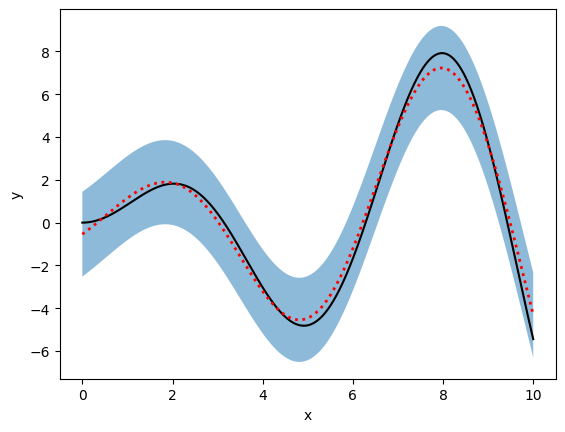

In [8]:
plt.plot(testX,testY,color='black')
plt.plot(testX,mean_prediction,ls=':',lw=2,color='red')
plt.fill_between(testX,
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.xlabel('x')
plt.ylabel('y')
plt.show()